In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Read image as gray scale

In [4]:
img = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00097.jpg',0)
# cv.imread(img, x) => x=-1 : read unchanged, x=0 : read grayscale, x = 1 : read color) 

### Plot with imshow

In [5]:
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

### Plot with matplotlib

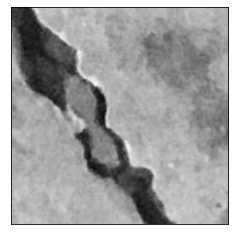

In [6]:
# plotting with matplotlib => something about BGR vs RGB and possible wrong displaying!
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Image Numpy array info

In [7]:
print(img)
print(type(img))
print(img.dtype)
print(img.ndim)
print(img.shape)

[[ 52  46  40 ... 130 124 118]
 [ 53  44  37 ... 128 123 118]
 [ 57  48  40 ... 129 124 120]
 ...
 [135 133 130 ... 102 100  98]
 [134 132 129 ... 102 100  98]
 [132 131 127 ... 102 100  98]]
<class 'numpy.ndarray'>
uint8
2
(227, 227)


### Edge detection on image read as gray

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


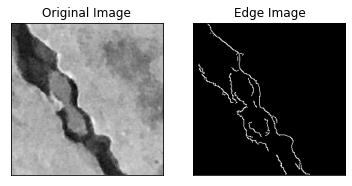

In [8]:
edges = cv.Canny(img,100,200) # apertureSize=7 gives fragmented image !
print(edges)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Read image unchanged and convert to gray scale

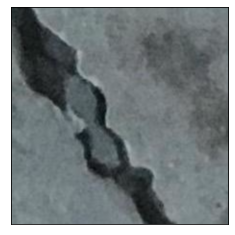

In [9]:
# read unchanged and convert to grayscale
imgUnchanged = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00097.jpg',-1) 
grayed = cv.cvtColor(imgUnchanged, cv.COLOR_BGR2GRAY)

plt.imshow(imgUnchanged, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

### Blur to reduce (background) noise

In [10]:
# Blur
blur = cv.blur(img,(5,5))

In [11]:
# Gaussian blur
gauss = cv.GaussianBlur(img,(5,5),0)

In [12]:
# Median blur
median = cv.medianBlur(img,5)

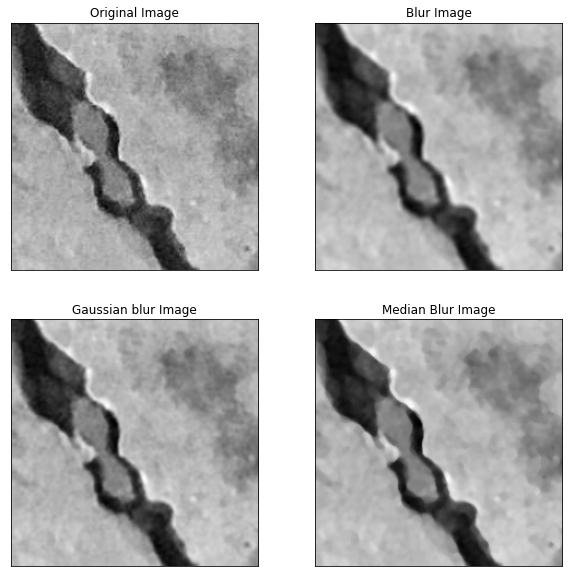

In [13]:
# Comparison
plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(blur,cmap = 'gray')
plt.title('Blur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gauss,cmap = 'gray')
plt.title('Gaussian blur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median,cmap = 'gray')
plt.title('Median Blur Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Algorithm 'An improved image processing method for assessing multiplecracking development in Strain Hardening Cementitious Composites'

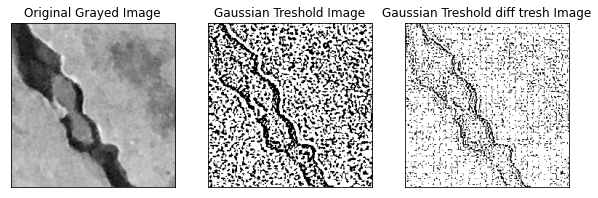

In [14]:
# create binary image from image (gives black and white image like edge detection)
# => use adaptive treshold, Gaussian

# Input needs to be gray scaled imaged so read unchanged and convert to grayscale
imgUnchanged = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00097.jpg',-1) 
grayed = cv.cvtColor(imgUnchanged, cv.COLOR_BGR2GRAY)
# Gaussian tresholds
th = cv.adaptiveThreshold(grayed,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
th2 = cv.adaptiveThreshold(grayed,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,3,2)

plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(grayed,cmap = 'gray')
plt.title('Original Grayed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(th,cmap = 'gray')
plt.title('Gaussian Treshold Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(th2, cmap = 'gray')
plt.title('Gaussian Treshold diff tresh Image'), plt.xticks([]), plt.yticks([])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
# Is Canny Edge not better??

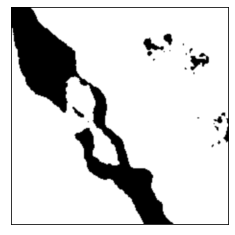

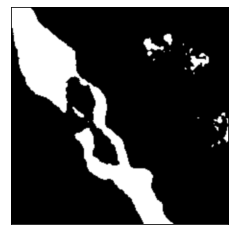

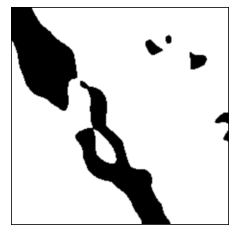

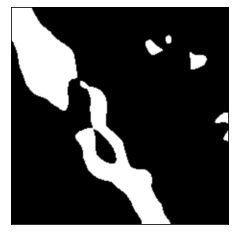

In [15]:
# Otsu's thresholding after Gaussian filtering
imgUnchanged = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00097.jpg',-1) 
grayed = cv.cvtColor(imgUnchanged, cv.COLOR_BGR2GRAY)

# Guassian blur followed by binary treshold => too high a kernel size might mean I miss finer cracks 
# but gives a smoother crack section
blur = cv.GaussianBlur(grayed,(5,5),0) # kernelsize tuple must be odd and positive
blur2 = cv.GaussianBlur(grayed,(21,21),0) # kernelsize tuple must be odd and positive
# plt.imshow(blur, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
# plt.show()

ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(th3, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()
# Same but inversed binary threshold
ret4,th4 = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(th4, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

ret3,th3 = cv.threshold(blur2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(th3, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()
# Same but inversed binary threshold
ret4,th4 = cv.threshold(blur2,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(th4, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

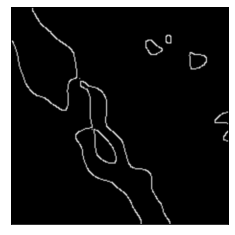

In [16]:
edges = cv.Canny(th4,100,200,apertureSize =7)

plt.imshow(edges,cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

In [17]:
print(edges)
#np.set_printoptions(threshold=np.inf)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### Find contours and draw bounding boxes around cracks

In [18]:
# Find contours  => you can also start from th4 instead of the canny edge image of th4
contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [19]:
# Approximate contours to polygons + get bounding rects and circles
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True) # cv.approxPolyDP(contour, epsilon, True)
    boundRect[i] = cv.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])

In [20]:
drawing = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)

In [21]:
# Draw polygonal contour + bounding rectangles
import random
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(drawing, contours_poly, i, color)
    cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
     (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

In [22]:
# Show in a window
cv.imshow('Contours', drawing)
cv.waitKey(0) # press any key to close img show window !
cv.destroyAllWindows()

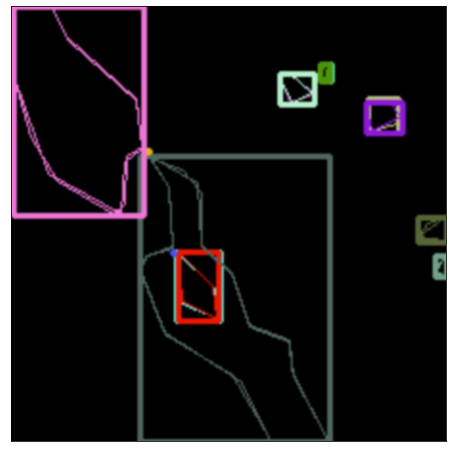

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(drawing,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()

In [25]:
# epsilon = 0.1*cv.arcLength(cnt,True)
# approx = cv.approxPolyDP(cnt,epsilon,True)

#### Minimum area rotated bounding boxes

In [26]:
# Find contours  => you can also start from th4 instead of the canny edge image of th4
contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [28]:
# Approximate contours to polygons + get bounding rects and circles
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True) # cv.approxPolyDP(contour, epsilon, True)
    #boundRect[i] = cv.boundingRect(contours_poly[i])
    rect = cv.minAreaRect(contours_poly[i])
    box = cv.boxPoints(rect)
    box = np.int0(box)
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])
#rect = cv.minAreaRect(cnt)
#box = cv.boxPoints(rect)
#box = np.int0(box)
#cv.drawContours(img,[box],0,(0,0,255),2)

In [29]:
drawing = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)


In [37]:
# Draw polygonal contour + bounding rectangles
import random
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(img,[box],0,(0,0,255),2)
    #cv.drawContours(drawing, contours_poly, i, color)
    #cv.rectangle(drawing, (int(rect[i][0]), int(rect[i][1])), \
     #(int(rect[i][0]+rect[i][2]), int(rect[i][1]+rect[i][3])), color, 2)

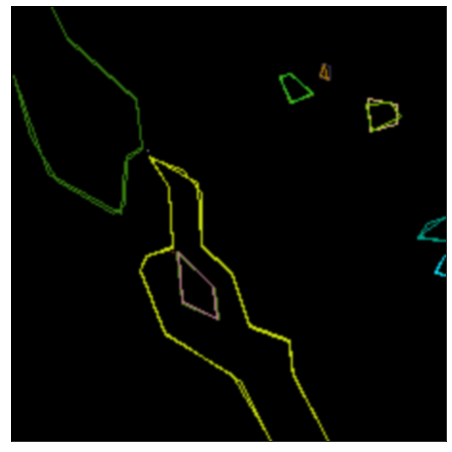

In [38]:
plt.figure(figsize=(8,8))
plt.imshow(drawing,cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
plt.show()